<a href="https://colab.research.google.com/github/DavidS-UNCC/ECGR_4105-Souto/blob/main/Homework_5_(David_Souto).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 5

# Problem 1

In [324]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import torch
import torch.nn as nn
import torch.optim as optim

In [325]:
# Import data
# In[2]:
t_c = ([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = ([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

# Reshape for compatability
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

# Normalize data
t_u_mean = t_u.mean()
t_u_std = t_u.std()
t_u_normalized = (t_u - t_u_mean) / t_u_std
t_c_mean = t_c.mean()
t_c_std = t_c.std()
t_c_normalized = (t_c - t_c_mean) / t_c_std

display("t_c", t_c, "")
display("t_u", t_u)

't_c'

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])

''

't_u'

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [326]:
# Nonlinear Model
class NonlinearModel(nn.Module):
  def __init__(self):
    super(NonlinearModel, self).__init__()
    # Define the model parameters for w2, w1, and b
    self.w2 = nn.Parameter(torch.randn(1))
    self.w1 = nn.Parameter(torch.randn(1))
    self.b = nn.Parameter(torch.randn(1))

  def forward(self, x):
    # Define the forward pass using the nonlinear formula
    return self.w2 * x ** 2 + self.w1 * x + self.b

# Loss function
loss_fn = nn.MSELoss()

In [327]:
# Training loop function
def train_model(model, t_u, t_c, learning_rate, num_epochs=5000):
  optimizer = optim.SGD(model.parameters(), lr=learning_rate)
  losses = []
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = model(t_u)
    loss = loss_fn(output, t_c)
    loss.backward()
    optimizer.step()

    # Record loss at intervals
    if epoch % 500 == 0:
      print(f"Epoch {epoch}, Loss: {loss.item():.4f}")
    losses.append(loss.item())
  return losses

In [328]:
# Test with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = {}
for lr in learning_rates:
  print(f"\nTraining with learning rate: {lr}")
  model = NonlinearModel()
  losses = train_model(model, t_u_normalized, t_c_normalized, learning_rate=lr)
  results[lr] = {'model': model, 'losses': losses}


Training with learning rate: 0.1
Epoch 0, Loss: 1.3040
Epoch 500, Loss: 0.0246
Epoch 1000, Loss: 0.0246
Epoch 1500, Loss: 0.0246
Epoch 2000, Loss: 0.0246
Epoch 2500, Loss: 0.0246
Epoch 3000, Loss: 0.0246
Epoch 3500, Loss: 0.0246
Epoch 4000, Loss: 0.0246
Epoch 4500, Loss: 0.0246

Training with learning rate: 0.01
Epoch 0, Loss: 27.9307
Epoch 500, Loss: 0.0246
Epoch 1000, Loss: 0.0246
Epoch 1500, Loss: 0.0246
Epoch 2000, Loss: 0.0246
Epoch 2500, Loss: 0.0246
Epoch 3000, Loss: 0.0246
Epoch 3500, Loss: 0.0246
Epoch 4000, Loss: 0.0246
Epoch 4500, Loss: 0.0246

Training with learning rate: 0.001
Epoch 0, Loss: 3.1673
Epoch 500, Loss: 0.3125
Epoch 1000, Loss: 0.1051
Epoch 1500, Loss: 0.0509
Epoch 2000, Loss: 0.0338
Epoch 2500, Loss: 0.0280
Epoch 3000, Loss: 0.0259
Epoch 3500, Loss: 0.0251
Epoch 4000, Loss: 0.0248
Epoch 4500, Loss: 0.0247

Training with learning rate: 0.0001
Epoch 0, Loss: 9.4369
Epoch 500, Loss: 6.2604
Epoch 1000, Loss: 4.2788
Epoch 1500, Loss: 3.0193
Epoch 2000, Loss: 2.200

In [329]:
# Select best model based on final loss
best_lr = min(results, key=lambda lr: results[lr]['losses'][-1])
best_model = results[best_lr]['model']
best_losses = results[best_lr]['losses']

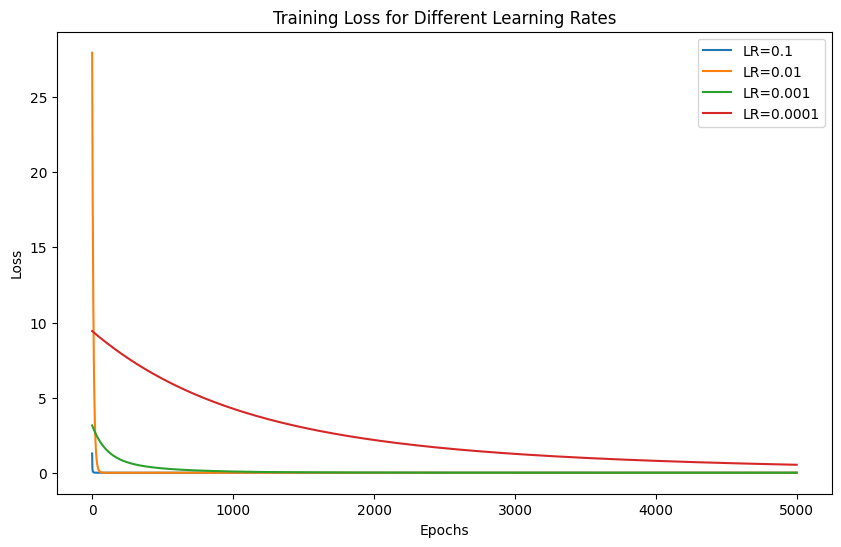

In [330]:
# Plotting losses for each learning rate
plt.figure(figsize=(10, 6))
for lr, result in results.items():
  plt.plot(result['losses'], label=f"LR={lr}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss for Different Learning Rates")
plt.show()

In [331]:
# Linear model for comparison
class LinearModel(nn.Module):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.w = nn.Parameter(torch.randn(1))
    self.b = nn.Parameter(torch.randn(1))

  def forward(self, x):
      return self.w * x + self.b

In [332]:
# Train the linear model
linear_model = LinearModel()
linear_optimizer = optim.SGD(linear_model.parameters(), lr=0.01)
linear_losses = []
for epoch in range(5000):
  linear_optimizer.zero_grad()
  output = linear_model(t_u_normalized)
  loss = loss_fn(output, t_c_normalized)
  loss.backward()
  linear_optimizer.step()
  linear_losses.append(loss.item())

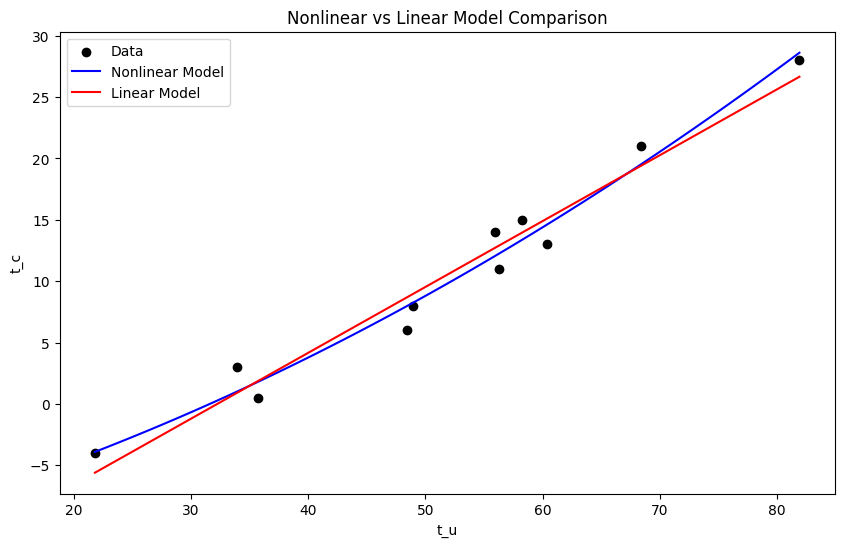

In [333]:
# Nonlinear vs linear model visualization
t_u_linspace = torch.linspace(t_u_normalized.min(), t_u_normalized.max(), 100)
with torch.no_grad():
  t_c_pred_nonlinear = best_model(t_u_linspace) * t_c_std + t_c_mean
  t_c_pred_linear = linear_model(t_u_linspace) * t_c_std + t_c_mean

plt.figure(figsize=(10, 6))
plt.scatter(t_u, t_c, label="Data", color='black')
plt.plot(t_u_linspace * t_u_std + t_u_mean, t_c_pred_nonlinear, label="Nonlinear Model", color='blue')
plt.plot(t_u_linspace * t_u_std + t_u_mean, t_c_pred_linear, label="Linear Model", color='red')
plt.xlabel("t_u")
plt.ylabel("t_c")
plt.legend()
plt.title("Nonlinear vs Linear Model Comparison")
plt.show()


In [334]:
# Display the final best loss for both models
print(f"Best Nonlinear Model Loss: {best_losses[-1]:.4f}")
print(f"Linear Model Loss: {linear_losses[-1]:.4f}")

Best Nonlinear Model Loss: 0.0246
Linear Model Loss: 0.0345


# Problem 2

In [335]:
# Import libraries
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [336]:
# Load data
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'
housing_data = pd.read_csv(url)

# Select relevant features and target variable
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = housing_data[features]
y = housing_data[target]

In [337]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [338]:
# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

In [339]:
# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [340]:
# Define linear regression model
class LinearRegressionModel(nn.Module):
  def __init__(self, input_dim):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(input_dim, 1)

  def forward(self, x):
    return self.linear(x)

In [341]:
# Define training function
def train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, epochs, report_interval):
  train_losses = []
  val_losses = []

  for epoch in range(1, epochs + 1):
    # Training step
    model.train()
    optimizer.zero_grad()
    predictions = model(X_train)
    train_loss = criterion(predictions, y_train)
    train_loss.backward()
    optimizer.step()

    # Validation step
    model.eval()
    with torch.no_grad():
      val_predictions = model(X_val)
      val_loss = criterion(val_predictions, y_val)

    # Store losses
    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

    # Report progress
    if epoch % report_interval == 0:
      print(f"Epoch {epoch}/{epochs} - Train Loss: {train_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

    return train_losses, val_losses

In [342]:
# Experiment with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs = 5000
report_interval = 500
best_model = None
best_val_loss = float('inf')

# Start experiment with each learning rate
for lr in learning_rates:
    print(f"\nTraining with Learning Rate: {lr}")
    model = LinearRegressionModel(input_dim=X.shape[1])  # Use all features
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    # Train the model and collect losses
    train_losses, val_losses = train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, epochs, report_interval)

    # Report training and validation losses every 500 epochs
    for epoch in range(0, len(train_losses)):
        print(f"Epoch {epoch*500 + 500}/{epochs} - "
              f"Train Loss: {train_losses[epoch]:.4f}, "
              f"Validation Loss: {val_losses[epoch]:.4f}")

    # Check if this is the best model based on validation loss
    if min(val_losses) < best_val_loss:
        best_val_loss = min(val_losses)
        best_model = model




Training with Learning Rate: 0.1
Epoch 500/5000 - Train Loss: 25234797232128.0000, Validation Loss: 19957276475392.0000

Training with Learning Rate: 0.01
Epoch 500/5000 - Train Loss: 25234795134976.0000, Validation Loss: 29008307683328.0000

Training with Learning Rate: 0.001
Epoch 500/5000 - Train Loss: 25234788843520.0000, Validation Loss: 30016777748480.0000

Training with Learning Rate: 0.0001
Epoch 500/5000 - Train Loss: 25234788843520.0000, Validation Loss: 30118661586944.0000


In [343]:
# Report the best model results
print(f"\nBest Validation Loss: {best_val_loss:.4f}")


Best Validation Loss: 19957276475392.0000


# Problem 3

In [344]:
# Import libraries
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [345]:
# Load data
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'
housing_data = pd.read_csv(url)

In [346]:
# Identify binary and categorical columns
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
categorical_columns = ['furnishingstatus']  # This contains furnished/semi-furnished/unfurnished

# Binary encode (yes/no -> 1/0)
for column in binary_columns:
  housing_data[column] = housing_data[column].map({'yes': 1, 'no': 0})

# One-hot encode categorical columns
housing_data = pd.get_dummies(housing_data, columns=categorical_columns, drop_first=True)

In [347]:
# Extract features and target
features = housing_data.columns.drop('price')  # Drop the target column
target = 'price'

X = housing_data[features]
y = housing_data[target]

In [348]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [349]:
# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [350]:
# Define linear regression model
class LinearRegressionModel(nn.Module):
  def __init__(self, input_dim):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(input_dim, 1)

  def forward(self, x):
    return self.linear(x)

In [351]:
# Define training function
def train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, epochs, report_interval):
  train_losses = []
  val_losses = []

  for epoch in range(1, epochs + 1):
    # Training step
    model.train()
    optimizer.zero_grad()
    predictions = model(X_train)
    train_loss = criterion(predictions, y_train)
    train_loss.backward()
    optimizer.step()

    # Validation step
    model.eval()
    with torch.no_grad():
      val_predictions = model(X_val)
      val_loss = criterion(val_predictions, y_val)

    # Store losses
    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

    # Report progress
    if epoch % report_interval == 0:
      print(f"Epoch {epoch}/{epochs} - Train Loss: {train_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

  return train_losses, val_losses


Training with Learning Rate: 0.1
Epoch 500/5000 - Train Loss: 968358232064.0000, Validation Loss: 1754319290368.0000
Epoch 1000/5000 - Train Loss: 968358232064.0000, Validation Loss: 1754319290368.0000
Epoch 1500/5000 - Train Loss: 968358232064.0000, Validation Loss: 1754319290368.0000
Epoch 2000/5000 - Train Loss: 968358232064.0000, Validation Loss: 1754319290368.0000
Epoch 2500/5000 - Train Loss: 968358232064.0000, Validation Loss: 1754319290368.0000
Epoch 3000/5000 - Train Loss: 968358232064.0000, Validation Loss: 1754319290368.0000
Epoch 3500/5000 - Train Loss: 968358232064.0000, Validation Loss: 1754319290368.0000
Epoch 4000/5000 - Train Loss: 968358232064.0000, Validation Loss: 1754319290368.0000
Epoch 4500/5000 - Train Loss: 968358232064.0000, Validation Loss: 1754319290368.0000
Epoch 5000/5000 - Train Loss: 968358232064.0000, Validation Loss: 1754319290368.0000


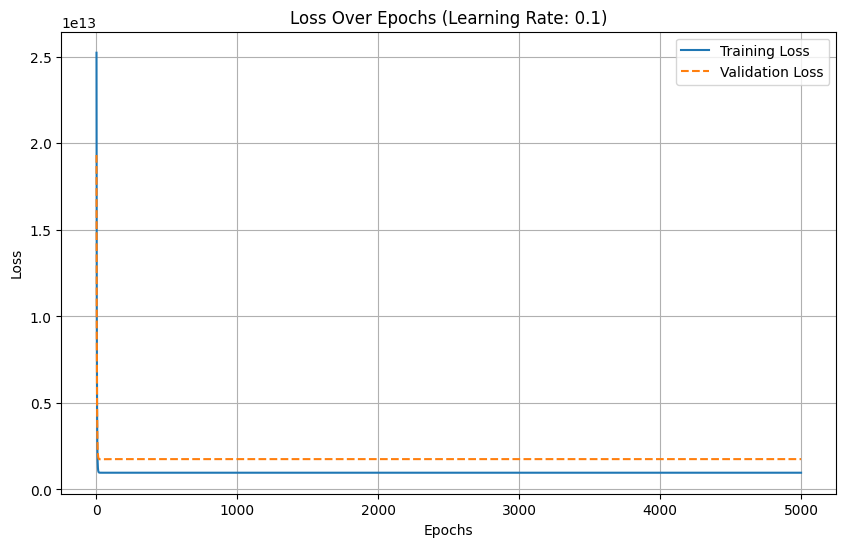


Training with Learning Rate: 0.01
Epoch 500/5000 - Train Loss: 968365965312.0000, Validation Loss: 1753438617600.0000
Epoch 1000/5000 - Train Loss: 968358232064.0000, Validation Loss: 1754317848576.0000
Epoch 1500/5000 - Train Loss: 968358232064.0000, Validation Loss: 1754322567168.0000
Epoch 2000/5000 - Train Loss: 968358232064.0000, Validation Loss: 1754322567168.0000
Epoch 2500/5000 - Train Loss: 968358232064.0000, Validation Loss: 1754322567168.0000
Epoch 3000/5000 - Train Loss: 968358232064.0000, Validation Loss: 1754322567168.0000
Epoch 3500/5000 - Train Loss: 968358232064.0000, Validation Loss: 1754322567168.0000
Epoch 4000/5000 - Train Loss: 968358232064.0000, Validation Loss: 1754322567168.0000
Epoch 4500/5000 - Train Loss: 968358232064.0000, Validation Loss: 1754322567168.0000
Epoch 5000/5000 - Train Loss: 968358232064.0000, Validation Loss: 1754322567168.0000


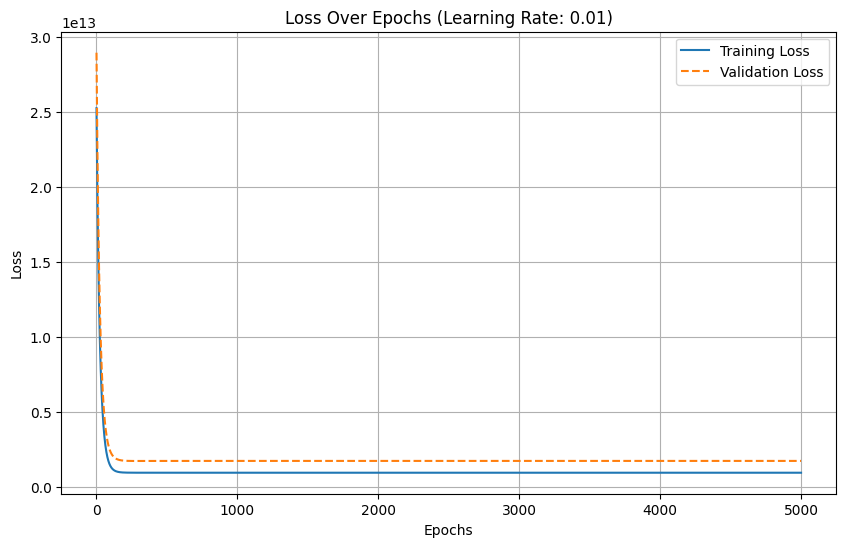


Training with Learning Rate: 0.001
Epoch 500/5000 - Train Loss: 4100629987328.0000, Validation Loss: 5679298379776.0000
Epoch 1000/5000 - Train Loss: 1409234894848.0000, Validation Loss: 2386212159488.0000
Epoch 1500/5000 - Train Loss: 1034054926336.0000, Validation Loss: 1861705138176.0000
Epoch 2000/5000 - Train Loss: 979266371584.0000, Validation Loss: 1768618065920.0000
Epoch 2500/5000 - Train Loss: 970531012608.0000, Validation Loss: 1751711612928.0000
Epoch 3000/5000 - Train Loss: 968900214784.0000, Validation Loss: 1749810413568.0000
Epoch 3500/5000 - Train Loss: 968522203136.0000, Validation Loss: 1750767632384.0000
Epoch 4000/5000 - Train Loss: 968414593024.0000, Validation Loss: 1751945052160.0000
Epoch 4500/5000 - Train Loss: 968379072512.0000, Validation Loss: 1752835162112.0000
Epoch 5000/5000 - Train Loss: 968366227456.0000, Validation Loss: 1753423413248.0000


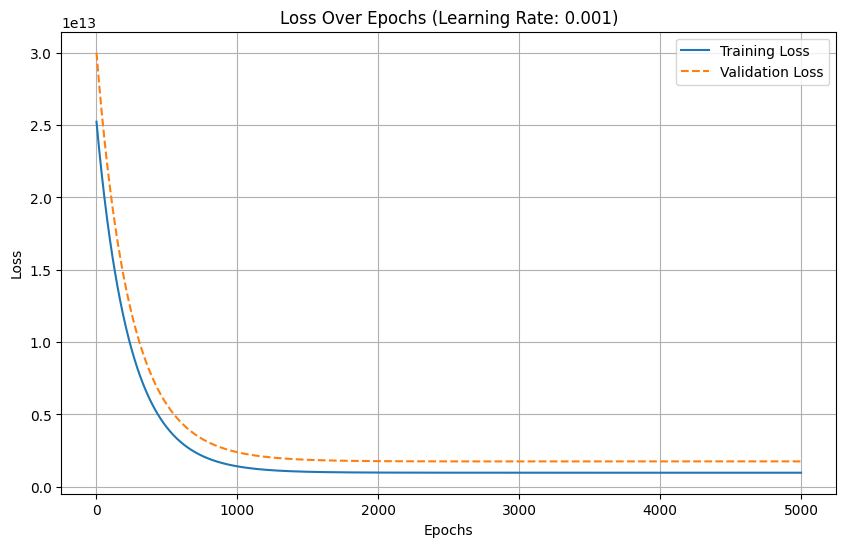


Training with Learning Rate: 0.0001
Epoch 500/5000 - Train Loss: 20513824964608.0000, Validation Loss: 24712398766080.0000
Epoch 1000/5000 - Train Loss: 16775112556544.0000, Validation Loss: 20419362947072.0000
Epoch 1500/5000 - Train Loss: 13796135403520.0000, Validation Loss: 16989011574784.0000
Epoch 2000/5000 - Train Loss: 11406706475008.0000, Validation Loss: 14229327314944.0000
Epoch 2500/5000 - Train Loss: 9480137867264.0000, Validation Loss: 11996923691008.0000
Epoch 3000/5000 - Train Loss: 7920482254848.0000, Validation Loss: 10182988922880.0000
Epoch 3500/5000 - Train Loss: 6653897342976.0000, Validation Loss: 8703708233728.0000
Epoch 4000/5000 - Train Loss: 5622829940736.0000, Validation Loss: 7493734891520.0000
Epoch 4500/5000 - Train Loss: 4781902397440.0000, Validation Loss: 6501563367424.0000
Epoch 5000/5000 - Train Loss: 4095070961664.0000, Validation Loss: 5686286090240.0000


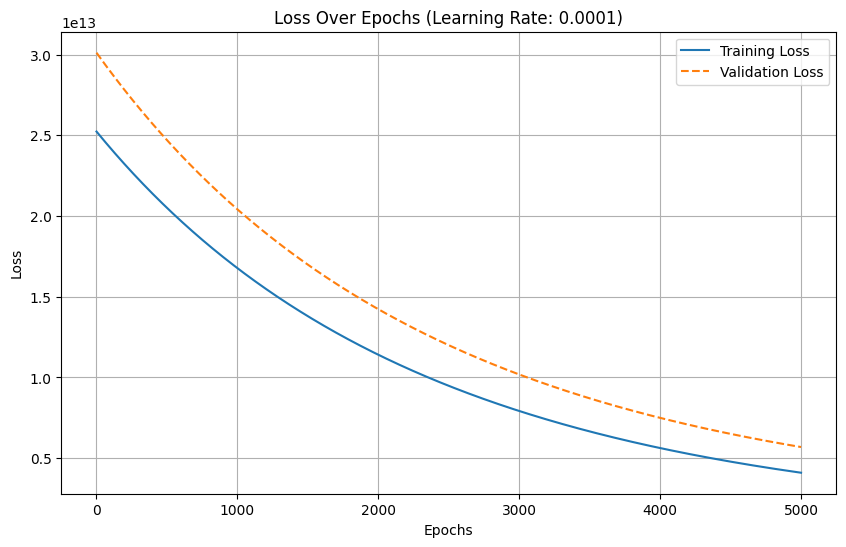

In [352]:
# Visualize the training and validation losses
def plot_losses(train_losses, val_losses, learning_rate):
  epochs = range(1, len(train_losses) + 1)
  plt.figure(figsize=(10, 6))
  plt.plot(epochs, train_losses, label='Training Loss')
  plt.plot(epochs, val_losses, label='Validation Loss', linestyle='--')
  plt.title(f"Loss Over Epochs (Learning Rate: {learning_rate})")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

# Re-run the training process and plot losses for each learning rate
for lr in learning_rates:
  print(f"\nTraining with Learning Rate: {lr}")
  model = LinearRegressionModel(input_dim=X.shape[1])  # Use all features
  criterion = nn.MSELoss()
  optimizer = optim.SGD(model.parameters(), lr=lr)

  train_losses, val_losses = train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, epochs, report_interval)

  # Plot the losses
  plot_losses(train_losses, val_losses, learning_rate=lr)

  # Check if this is the best model
  if min(val_losses) < best_val_loss:
    best_val_loss = min(val_losses)
    best_model = model

In [353]:
# Report the best model results
print(f"\nBest Validation Loss: {best_val_loss:.4f}")


Best Validation Loss: 1748346601472.0000
